# Data Mining - Assignment #2 - Clustering
### Problem C: Use the Cost to find the best number of clusters k for the data set.
i.e. run the k-mean algorithm for k = 1, 2,….,40 and calculate Cost. Generate a graph where you plot the Cost as a function of the number of cluster k=1...40.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load and merge Mnist test and train datasets:

In [8]:
mnist_test = pd.read_csv(r"mnist_test.csv", sep=",")
mnist_train = pd.read_csv(r"mnist_train.csv", sep=",")
mnist = pd.concat([mnist_train, mnist_test], ignore_index=True)
mnist.sample(20)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
35840,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21218,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48041,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1510,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40027,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11942,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60640,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56477,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11648,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Load KMean Functions that implemented in the previous steps (A & B):

In [9]:
from kmean import Cosine_IterativeKMean, Euclidean_IterativeKMean

Convert the dataframe to arrays that the k-mean function accepts

In [10]:
def sample(features, outputs, sample_size):
    rng = np.random.default_rng()    
    indices = rng.choice(len(outputs), size=sample_size, replace=False)    
    return features[indices], outputs[indices]

# Create the labels array (y) by selecting only the label column
true_labels = mnist['label'].to_numpy()
# Create the features array (X) by dropping the label column
features = mnist.drop(columns=['label'], axis=1).to_numpy()
features, true_labels = sample(features, true_labels, 20000)

### 1- When Euclidean distance is used as the distance measure for clustering

In [11]:
cof=[]
max_k = 40
for k in range(1,max_k+1):
    max_iter=20
    results = Euclidean_IterativeKMean(features, true_labels, k=k, max_iter=max_iter, include_cost=True, include_accuracy=False, include_silhouette=False)
    cof.append(results["cost"])
cof

[[np.float64(114558171585.0),
  np.float64(68403938081.05005),
  np.float64(68403938081.05005),
  np.float64(68403938081.05005),
  np.float64(68403938081.05005),
  np.float64(68403938081.05005),
  np.float64(68403938081.05005),
  np.float64(68403938081.05005),
  np.float64(68403938081.05005),
  np.float64(68403938081.05005),
  np.float64(68403938081.05005),
  np.float64(68403938081.05005),
  np.float64(68403938081.05005),
  np.float64(68403938081.05005),
  np.float64(68403938081.05005),
  np.float64(68403938081.05005),
  np.float64(68403938081.05005),
  np.float64(68403938081.05005),
  np.float64(68403938081.05005),
  np.float64(68403938081.05005)],
 [np.float64(104723925245.0),
  np.float64(64788554463.836975),
  np.float64(64361429541.96811),
  np.float64(64173794745.07846),
  np.float64(64085309002.96814),
  np.float64(64038792014.77144),
  np.float64(64015968830.673325),
  np.float64(64004675291.47351),
  np.float64(63998561237.775406),
  np.float64(63995375868.89499),
  np.float64

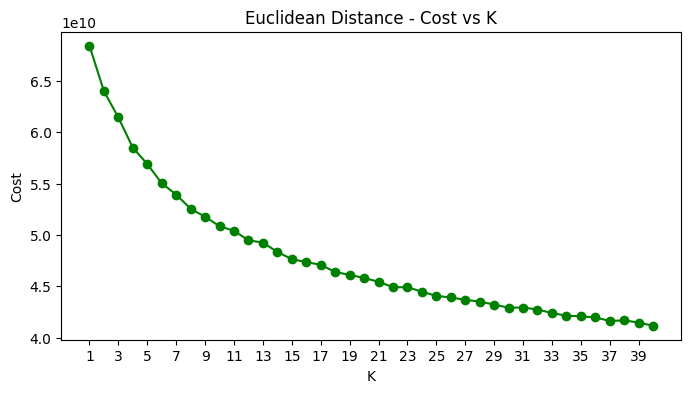

In [12]:
iterations = range(1, max_k + 1)

plt.figure(figsize=(8, 4))
plt.plot(iterations, np.array(cof)[:,-1], 'g-o')
plt.title("Euclidean Distance - Cost vs K")
plt.ylabel("Cost")
plt.xlabel("K")
plt.xticks(np.arange(1, max_k + 1, 2)) # Set step size to 2
plt.show()


### 2- When Cosine Similarity is used as the distance measure for clustering

In [13]:
cof2=[]
max_k = 40
for k in range(1, max_k + 1):
    max_iter=20
    results2 = Cosine_IterativeKMean(features, true_labels, k=k, max_iter=max_iter, include_cost=True, include_accuracy=False, include_silhouette=False)
    cof2.append(results2["cost"])
cof2

[[np.float64(10371.297601058111),
  np.float64(7321.752996067407),
  np.float64(7321.752996067407),
  np.float64(7321.752996067407),
  np.float64(7321.752996067407),
  np.float64(7321.752996067407),
  np.float64(7321.752996067407),
  np.float64(7321.752996067407),
  np.float64(7321.752996067407),
  np.float64(7321.752996067407),
  np.float64(7321.752996067407),
  np.float64(7321.752996067407),
  np.float64(7321.752996067407),
  np.float64(7321.752996067407),
  np.float64(7321.752996067407),
  np.float64(7321.752996067407),
  np.float64(7321.752996067407),
  np.float64(7321.752996067407),
  np.float64(7321.752996067407),
  np.float64(7321.752996067407)],
 [np.float64(10944.573992211856),
  np.float64(6858.556665775491),
  np.float64(6838.927298845634),
  np.float64(6830.0520620488205),
  np.float64(6821.61580262142),
  np.float64(6810.112918930608),
  np.float64(6797.50625286352),
  np.float64(6787.506365732802),
  np.float64(6779.855911946717),
  np.float64(6775.041744669935),
  np.flo

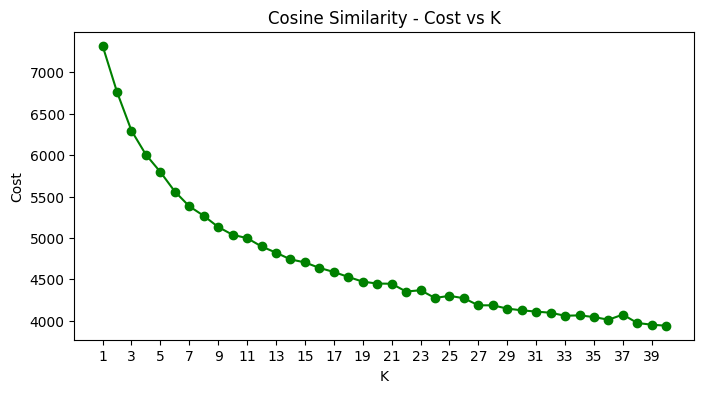

In [14]:
iterations = range(1, max_k + 1)

plt.figure(figsize=(8, 4))
plt.plot(iterations, np.array(cof2)[:,-1], 'g-o')
plt.title("Cosine Similarity - Cost vs K")
plt.ylabel("Cost")
plt.xlabel("K")
plt.xticks(np.arange(1, max_k + 1, 2)) # Set step size to 2
plt.show()
